In [78]:
!pip install e2b-code-interpreter

In [79]:
from google.colab import userdata
print(userdata.get('E2B_API_KEY'))

e2b_5bcef7c6ffd8a42b69d8ab1d8483c0bd878b9010


In [90]:
from e2b_code_interpreter import Sandbox
from google.colab import userdata

sbx = Sandbox(
    api_key=userdata.get('E2B_API_KEY'),
    template="desktop"
) # by default sandbox is  a live for 5 minutes

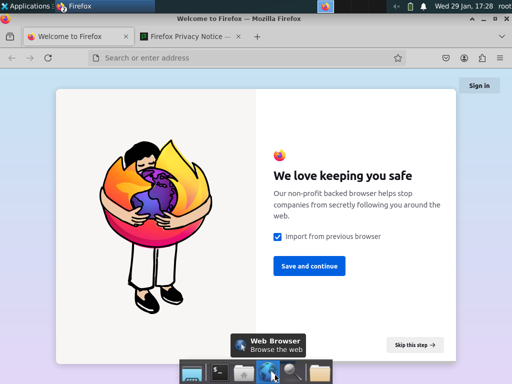

In [102]:
screenshot_path = "screenshot.png"
sbx.commands.run(f"scrot --pointer {screenshot_path}")
screenshot = sbx.files.read(screenshot_path, format="bytes")
sbx.files.remove(screenshot_path)

from io import BytesIO
from PIL import Image as PILImage
from IPython.display import display

img = PILImage.open(BytesIO(screenshot))
width, height = img.size
new_width = int(width * 0.5)
new_height = int(height * 0.5)
small_img = img.resize((new_width, new_height))
display(small_img)
img.save("screenshot.png")


In [93]:
sbx.commands.run("xdotool mousemove --sync 550 750")


TypeError: object CommandResult can't be used in 'await' expression

In [95]:
sbx.commands.run("xdotool click 1")

CommandResult(stderr='', stdout='', exit_code=0, error='')

In [82]:
import base64
print(base64.b64encode(screenshot).decode('utf-8'))

iVBORw0KGgoAAAANSUhEUgAABAAAAAMACAIAAAA12IJaAAAAA3NCSVQICAjb4U/gAAAgAElEQVR4Xux9B6AlRdH1fWnzAptY2AUWiRIEJIMKIipBFDBgFkGMIP4qIooCgor6qaBiQkFFVFRAspKDAb8PEARRFAUkbWADm/flv7pn5k6Hqu7qnpkb3t7nurypOufUqZp5b3vunZnbtdmOu9ZK/OoqUcuWqka9p7fWVY2y3UELRkaGa6OjLeiLZ6nYjivG5jlsZVR79t+erunjYKz1Q3c61jPWnhzd4fiqex7/l2+sXbmi6ioTp24wZqrUZ9Wz8WZVz63l9btqPd0tb7JjsKoJ9JYpbP36K1O8Vpl6ZcKltt8RMyZQbLcVY7f5zmjP5tvTNXGojKlmiB7HerizD8f6Hh77/XWO4bG/j10dlnECUO0xVK26nE0DSrj2QScXMoFiO6sYO8Rnq2Hbs/P2dI3t+7HTCdbd2I119tvY3bedzjoTWM8nUOwEoMJfjhVKr+e7XG+/XeZcwGcBapsfKm3YeRtaJg6SsdMJ0eDYCnd219jan51u2BMo69Bv3wuJ2aMac8CoE4CyDhh8mtWq4zXXr2g24VafdDF/xdhte0S0YdttaBk7PMZIG1hrYyjW2UtjaGd2WmmlCRT50eqcPDRnT1r3f4yf0L3hdNvLyMQpIgi7uMhetnXzSCJdlbqr8nqUk0Nu9UkX8Fenrl/HUbu1rfpt4z01RtoYm7//jJ1T4JfK2JxPp6tWmsAVF1/4xH13w5/LL/p+K/lqmBfqxxWNN8zV2C+knwBMmPixc8/72LlfG9SX+T27vnT8J76zdqPZ1cwj2ce1WTNmTJk8KSmhfl+k6KyZoDm5iMKY4GY/RemkW7anAv4KUFt2HAxj7dZ2u/m1doH6D5KV7ASaOAF1z8D3Tf6qu2myj075tpjAHru+aLdXHPLigw/dc7ddSjF81U9+eOWPLixFqvVEjB/11vrJb71xuRx1

In [83]:
print(userdata.get("GROQ_API_KEY"))

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


In [84]:
from openai import OpenAI

client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=userdata.get("GROQ_API_KEY")
)
tools = [{
    "type": "function",
    "function": {
        "name": "click_mouse",
        "description": "Click on an item on the screen.",
        "parameters": {
            "type": "object",
            "properties": {
                "query": {
                    "type": "string",
                    "description": "A description of what you want to click on"
                }
            },
            "required": [
                "query"
            ],
            "additionalProperties": False
        },
        "strict": True
    }
}]

import base64
base64_screenshot = base64.b64encode(screenshot).decode('utf-8')
completion = client.chat.completions.create(
    model="llama-3.2-90b-vision-preview",
    messages=[
        {"role": "user", "content": [
            {"type":"image_url", "image_url":{"url": f"data:image/jpeg;base64,{base64_screenshot}"}},
            {"type":"text", "text":"Here are the contents of the screen."},
            {"type":"text", "text":"The objective is: Check the weather using the web browser?"},
        ]}
    ],
    tools=tools
)

print(completion.choices[0].message.content)
print(completion.choices[0].message.tool_calls)

None
[ChatCompletionMessageToolCall(id='call_6jjw', function=Function(arguments='{"query": "web browser"}', name='click_mouse'), type='function')]


In [39]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 10.0 MB/s eta 0:00:00


In [85]:
from gradio_client import Client, handle_file

OSATLAS_HUGGINGFACE_SOURCE = "maxiw/OS-ATLAS"
OSATLAS_HUGGINGFACE_MODEL = "OS-Copilot/OS-Atlas-Base-7B"
OSATLAS_HUGGINGFACE_API = "/run_example"
huggingface_client = Client(OSATLAS_HUGGINGFACE_SOURCE)

result = huggingface_client.predict(
    image=handle_file("screenshot.png"),
    text_input="Click on the Web Broweser" + "\nReturn the response in the form of a box",
    model_id=OSATLAS_HUGGINGFACE_MODEL,
    api_name=OSATLAS_HUGGINGFACE_API
)
print(result)


Loaded as API: https://maxiw-os-atlas.hf.space ✔
('Web Broweser', '[[512.0, 724.992, 553.984, 768.0]]', '/tmp/gradio/195373f91269cb88507b9ad1193298a148598b286633e616f02b8c1cffc4ee28/image.webp')


In [86]:
result[1]

'[[512.0, 724.992, 553.984, 768.0]]'

In [87]:
import re

numbers = [float(number) for number in  re.findall(r"\d+.\d+", result[1])]
# x1, y1, x2, y2

result_x, result_y = (numbers[0] + numbers[2])//2 , (numbers[1] + numbers[3])//2
result_x, result_y

(532.0, 746.0)

In [62]:
sbx.commands.run(f"xdotool mousemove --sync {result_x} {result_y}")
sbx.commands.run("xdotool click 1")

CommandResult(stderr='', stdout='', exit_code=0, error='')

In [88]:
import re

def get_coordinates(query):
  result = huggingface_client.predict(
      image=handle_file("screenshot.png"),
      text_input= "Web browser" + "\nReturn the response in the form of a bbox",
      model_id=OSATLAS_HUGGINGFACE_MODEL,
      api_name=OSATLAS_HUGGINGFACE_API,
  )
  print(result)

  numbers = [float(number) for number in re.findall(r"\d+\.\d+", result[1])]
  # x1, y1, x2, y2

  result_x, result_y = (numbers[0] + numbers[2]) // 2, (numbers[1] + numbers[3]) // 2
  return result_x, result_y

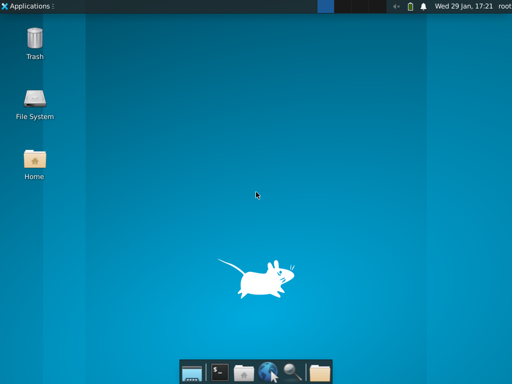

None
[ChatCompletionMessageToolCall(id='call_4wcw', function=Function(arguments='{"query": "Internet Browser"}', name='click_mouse'), type='function')]
Query=========
Internet Browser
('web browser', '[[512.0, 724.992, 553.984, 768.0]]', '/tmp/gradio/960c40eca115a4298af462ab523774c2079a7cca5de21da10c2b5d8aece5b68e/image.webp')


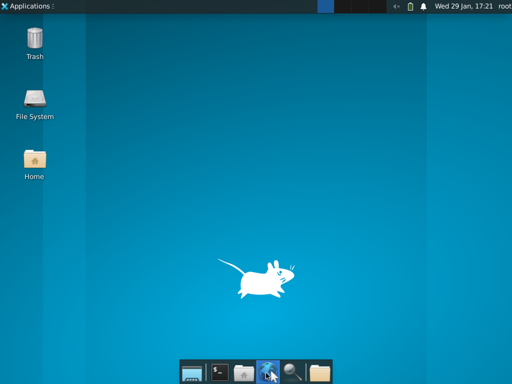

None
[ChatCompletionMessageToolCall(id='call_7yxb', function=Function(arguments='{"query": "web browser"}', name='click_mouse'), type='function')]
Query=========
web browser
('Web browser', '[[512.0, 718.8480000000001, 560.128, 768.0]]', '/tmp/gradio/37aab918de95ae803b4f2d11023c2d41d0bbe2633daf65e45da7ca07e90f4229/image.webp')


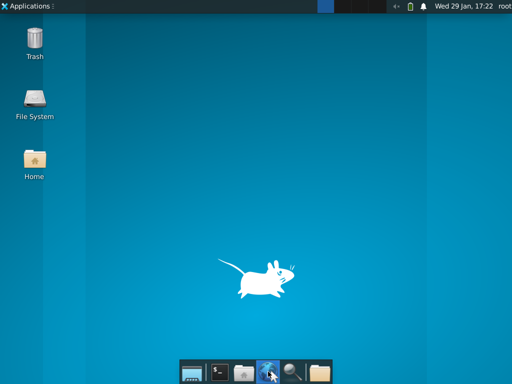

None
[ChatCompletionMessageToolCall(id='call_b50t', function=Function(arguments='{"query": "web browser"}', name='click_mouse'), type='function')]
Query=========
web browser
('Web browser', '[[512.0, 718.08, 559.104, 768.0]]', '/tmp/gradio/5dc731466c5df142150b9a527348cc009fbe407422b16d3bb3702e0d335156bb/image.webp')


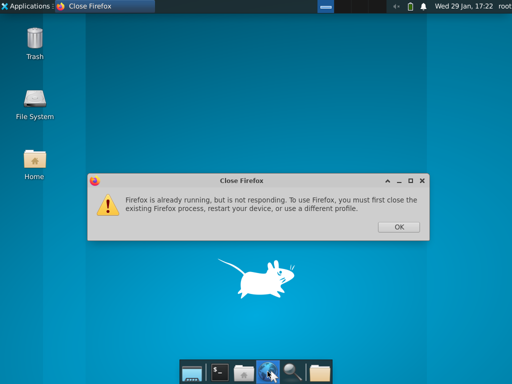

None
[ChatCompletionMessageToolCall(id='call_5kj8', function=Function(arguments='{"query": "Firefox"}', name='click_mouse'), type='function')]
Query=========
Firefox
('Web browser', '[[507.904, 718.08, 560.128, 768.0]]', '/tmp/gradio/b84c8f9c6a6388eae2f938561f2818fa122379223c7fc58d58bde67cb59eb431/image.webp')


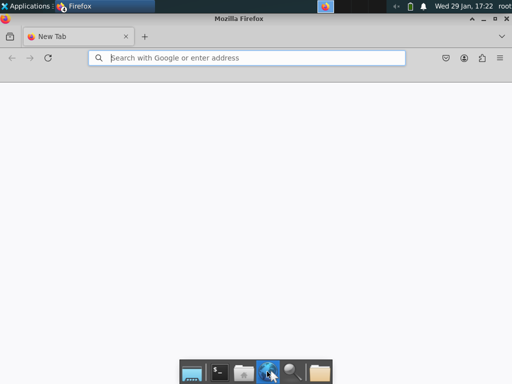

None
[ChatCompletionMessageToolCall(id='call_wf64', function=Function(arguments='{ "query": "browser icon" }', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_tjph', function=Function(arguments='{ "query": "address bar" }', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_zzz9', function=Function(arguments='{ "query": "weather website" }', name='click_mouse'), type='function'), ChatCompletionMessageToolCall(id='call_5806', function=Function(arguments='{ "query": "enter" }', name='click_mouse'), type='function')]
Query=========
browser icon
('Web browser', '[[0.0, 0.0, 308.224, 29.952]]', '/tmp/gradio/59ea5e9453b8665cca5e325fe6845704248ca4cf84b243d332ae68ecc04e78f2/image.webp')


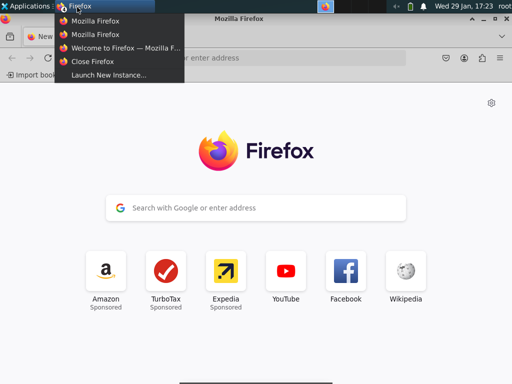

None
[ChatCompletionMessageToolCall(id='call_5z7m', function=Function(arguments='{"query": "the link to search on the toolbar"}', name='click_mouse'), type='function')]
Query=========
the link to search on the toolbar
('Web browser', '[[0.0, 0.0, 1024.0, 767.232]]', '/tmp/gradio/bedde9697c7b9aa9099ad32847f72db03ea4a80c728a38a4cd64c61a02d6853a/image.webp')


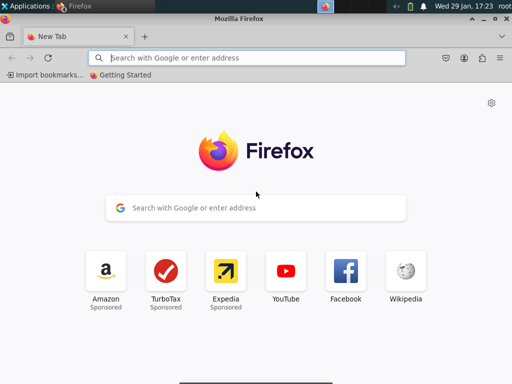

None
[ChatCompletionMessageToolCall(id='call_abet', function=Function(arguments='{"query": "search bar"}', name='click_mouse'), type='function')]
Query=========
search bar
('web browser', '[[0.0, 0.0, 1022.976, 767.232]]', '/tmp/gradio/14a79ed852307a8f95701914624739d09b00b91a722bc0c0c29ce3db2dd5aaba/image.webp')


KeyboardInterrupt: 

In [89]:
import base64
import json
import time
from io import BytesIO
from PIL import Image as PILImage
from IPython.display import display

while True:
  # Getting screen shot
  screenshot_path = "screenshot.png"
  sbx.commands.run(f"scrot --pointer {screenshot_path}")
  screenshot = sbx.files.read(screenshot_path, format="bytes")
  sbx.files.remove(screenshot_path)



  img = PILImage.open(BytesIO(screenshot))
  width, height = img.size
  new_width = int(width * 0.5)
  new_height = int(height * 0.5)
  small_img = img.resize((new_width, new_height))
  display(small_img)
  img.save("screenshot.png")

  base64_screenshot = base64.b64encode(screenshot).decode('utf-8')

  # Asking the LLM
  completion = client.chat.completions.create(
      model="llama-3.2-90b-vision-preview",
      messages=[
          {"role": "user", "content": [
              {"type":"image_url", "image_url":{"url": f"data:image/jpeg;base64,{base64_screenshot}"}},
              {"type":"text", "text":"Here are the contents of the screen."},
              {"type":"text", "text":"The objective is: Check the weather using the web browser?"},
          ]}
      ],
      tools=tools
  )

  print(completion.choices[0].message.content)
  print(completion.choices[0].message.tool_calls)

  tool_calls = completion.choices[0].message.tool_calls

  # running the tool
  if tool_calls:
    tool_call = tool_calls[0]
    function_name = tool_call.function.name

    if function_name == "click_mouse":
      query = json.loads(tool_call.function.arguments)["query"]
      print("Query=========")
      print(query)
      result_x, result_y = get_coordinates(query)
      sbx.commands.run(f"xdotool mousemove --sync {result_x} {result_y}")
      sbx.commands.run("xdotool click 1")
      time.sleep(5)
    else:
      print("No tool called")
      break



